# Digit Recognizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from toolz.functoolz import pipe
%matplotlib inline
sns.set(style="dark", rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.color_palette("Paired"))

In [2]:
# Plots images
def plot_images(images, cols = 1, labels = None):
    n_images = len(images)
    if labels is None: labels = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize=(16, n_images))
    for n, (image, label) in enumerate(zip(images, labels)):
        axes = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n + 1)
        plt.axis('off')
        if image.ndim == 2 or image.shape[2] == 1:
            plt.gray()
        plt.imshow(image)
        axes.set_title(label)
    plt.show()

In [3]:
data = pd.read_csv('dataset/train.csv') # This data will be split into train, test, valid
submission_test = pd.read_csv('dataset/test.csv') # submission_test is the dataset we are using for the submission
Xtrain, Xtest = train_test_split(data, test_size=0.2)
Xtrain, Xvalid = train_test_split(Xtrain, test_size=0.2)

Ytrain = Xtrain.pop('label')
Ytest = Xtest.pop('label')
Yvalid = Xvalid.pop('label')

In [4]:
Xtrain.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Ytrain.head()

41015    8
29492    4
2602     6
9961     9
31897    8
Name: label, dtype: int64

In [6]:
Xtest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Ytest.head()

2454     0
10796    9
31092    0
11767    8
13230    8
Name: label, dtype: int64

In [8]:
Xvalid.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Yvalid.head()

12344    4
9010     4
25212    9
6081     5
13205    9
Name: label, dtype: int64

In [10]:
num_train = len(Xtrain)
num_test = len(Xtest)
num_valid = len(Xvalid)
total_examples = num_train + num_test + num_valid
print("There are " + str(num_train) + " training examples")
print("There are " + str(num_test) + " test examples")
print("There are " + str(num_valid) + " validation examples")
print(str(num_train/total_examples*100) + "% of the total data set is train.")
print(str(num_test/total_examples*100) + "% of the total dat set is test.")
print(str(num_valid/total_examples*100) + "% of the total dat set is valid.")

There are 26880 training examples
There are 8400 test examples
There are 6720 validation examples
64.0% of the total data set is train.
20.0% of the total dat set is test.
16.0% of the total dat set is valid.


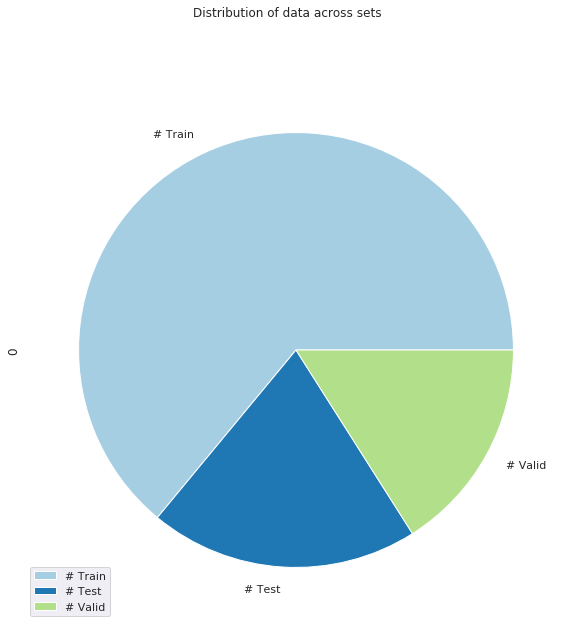

In [11]:
all_data = pd.DataFrame([num_train, num_test, num_valid],index=['# Train', '# Test', '# Valid'])
all_data.plot.pie(subplots=True, figsize=(10, 10), title="Distribution of data across sets")
plt.show()

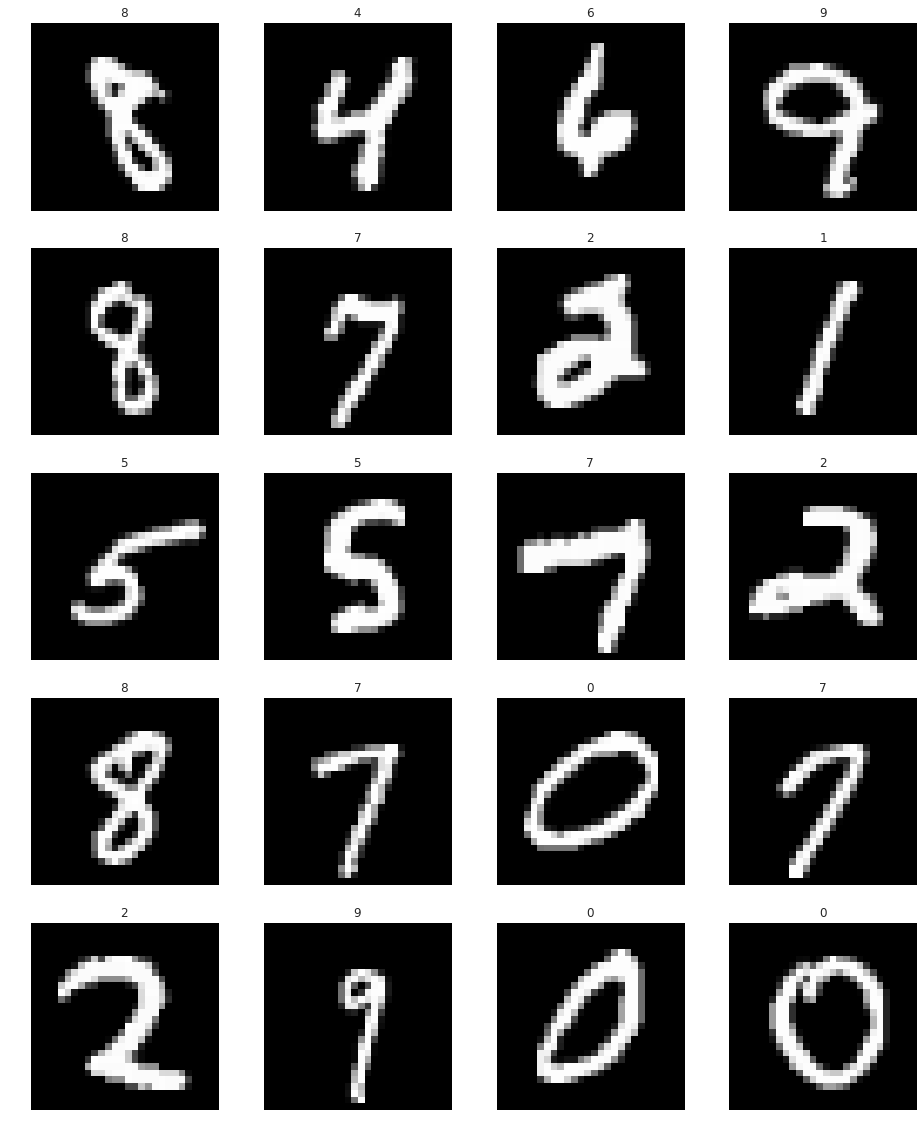

In [12]:
plot_images(Xtrain.head(20).values.reshape((-1, 28, 28)), cols=4, labels=Ytrain.head(20).values)

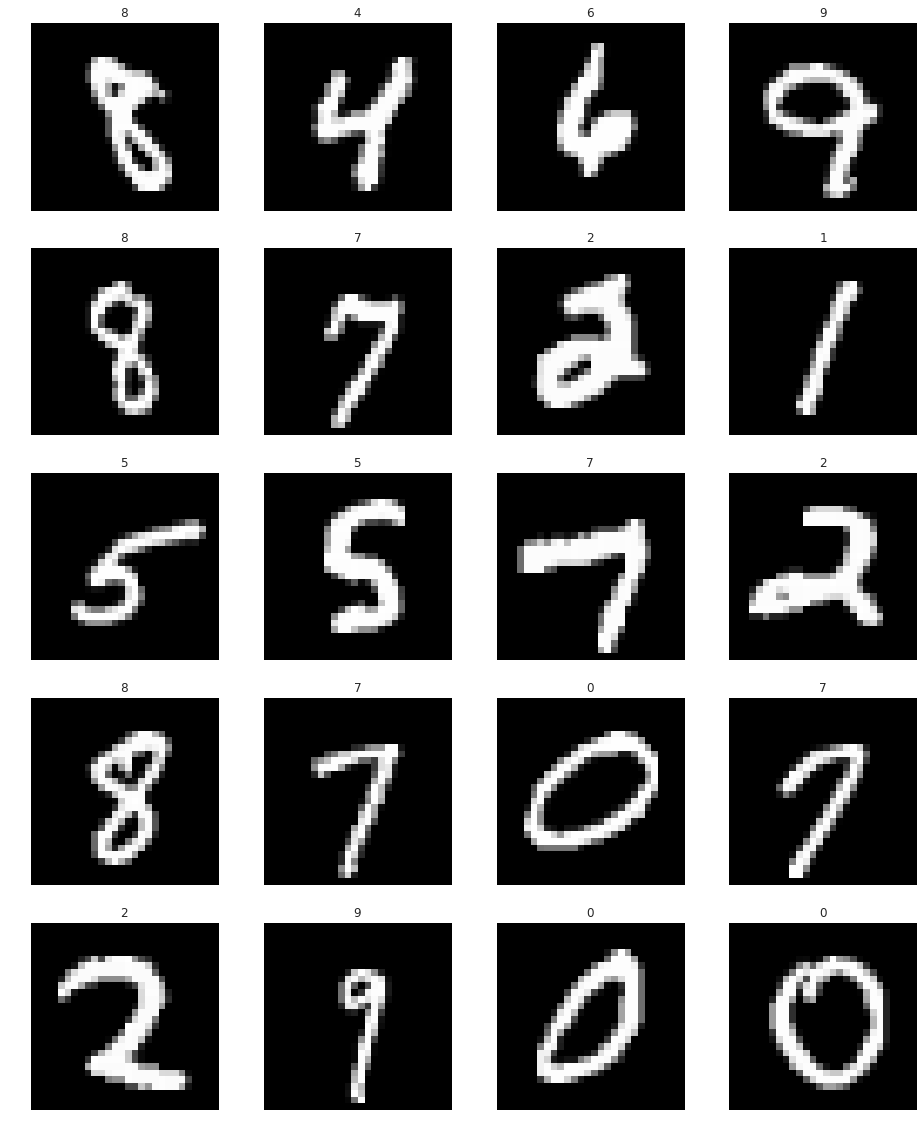

In [13]:
normalized_Xtrain_sample = Xtrain.head(20).values.reshape(-1, 28, 28) / 255.0
plot_images(normalized_Xtrain_sample, cols=4, labels=Ytrain.head(20).values)

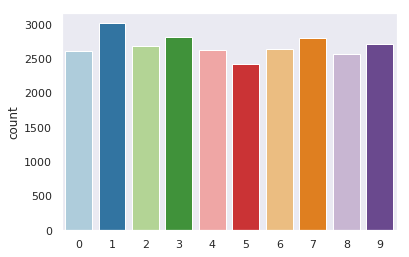

In [14]:
sns.countplot(Ytrain.values)
plt.show()

In [15]:
Xtrain = Xtrain.values.reshape(-1, 28, 28) / 255.0
Xvalid = Xvalid.values.reshape(-1, 28, 28) / 255.0
Xtest = Xtest.values.reshape(-1, 28, 28) / 255.0

In [26]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, ReLU, Dropout, Softmax, GlobalAveragePooling2D
from tensorflow.keras import Model

In [17]:
class DigitRecognizerModel(Model):
    def __init__(self):
        super(DigitRecognizerModel, self).__init__()
        '''
        self.conv1 = Conv2D(64, 3)
        self.maxpool1 = MaxPool2D((2, 2), padding="SAME")
        self.relu1 = ReLU()
        self.conv2 = Conv2D(32, 3)
        self.maxpool2 = MaxPool2D((2, 2), padding="SAME")
        self.relu2 = ReLU()
        self.flatten = Flatten()
        self.fc1 = Dense(128, activation="relu")
        self.dropout1 = Dropout(0.5)
        self.fc2 = Dense(10, activation="softmax")
        '''
        self.conv1 = Conv2D(filters=96, kernel_size=(3, 3), strides=(1, 1), activation="relu")
        self.conv2 = Conv2D(filters=96, kernel_size=(3, 3), strides=(1, 1), activation="relu")
        self.conv3 = Conv2D(filters=96, kernel_size=(3, 3), strides=(2, 2), activation="relu")
        self.conv4 = Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation="relu")
        self.conv5 = Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation="relu")
        self.conv6 = Conv2D(filters=192, kernel_size=(3, 3), strides=(2, 2), activation="relu")
        self.conv7 = Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation="relu")
        self.conv8 = Conv2D(filters=192, kernel_size=(1, 1), strides=(1, 1), activation="relu")
        self.conv9 = Conv2D(filters=10, kernel_size=(1, 1), strides=(1, 1), activation="relu")
        self.gap1 = GlobalAveragePooling2D()
        self.softmax = Softmax()
        
    def call(self, X):
        '''
        X = self.conv1(X)
        X = self.maxpool1(X)
        X = self.relu1(X)
        X = self.conv2(X)
        X = self.maxpool2(X)
        X = self.relu2(X)
        X = self.flatten(X)
        X = self.fc1(X)
        X = self.dropout1(X)
        X = self.fc2(X)
        return X
        '''
        return pipe(
            X,
            self.conv1,
            self.conv2,
            self.conv3,
            self.conv4,
            self.conv5,
            self.conv6,
            self.conv7,
            self.conv8,
            self.conv9,
            self.gap1,
            self.softmax
        )

In [18]:
model = DigitRecognizerModel()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [19]:
train_loss = tf.keras.metrics.Mean(name="train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_accuracy")

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [20]:
valid_loss = tf.keras.metrics.Mean(name="valid_loss")
valid_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="valid_accuracy")

@tf.function
def valid_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    
    valid_loss(t_loss)
    valid_accuracy(labels, predictions)

In [21]:
test_loss = tf.keras.metrics.Mean(name="test_loss")
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="test_accuracy")
test_top_k = lambda y_true, y_pred: tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, name="test_top_k")

@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)
    test_top_k(labels, predictions)

In [22]:
Xtrain = Xtrain[..., tf.newaxis]
Xvalid = Xvalid[..., tf.newaxis]
Xtest = Xtest[..., tf.newaxis]

train_data = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain.values)).shuffle(len(Xtrain)).batch(32)
valid_data = tf.data.Dataset.from_tensor_slices((Xvalid, Yvalid.values)).shuffle(len(Xvalid)).batch(32)

In [23]:
EPOCHS = 10

for epoch in range(EPOCHS):
    for images, labels in train_data:
        train_step(images, labels)
    
    for images, labels in valid_data:
        valid_step(images, labels)
    
    template = 'Epoch {}, Train Loss: {}, Train Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
    print(
        template.format(
            epoch + 1,
            train_loss.result(),
            train_accuracy.result() * 100,
            valid_loss.result(),
            valid_accuracy.result() * 100
        )
    )

Epoch 1, Train Loss: 0.20710234344005585, Train Accuracy: 93.51934814453125, Validation Loss: 0.11403246223926544, Validation Accuracy: 96.47322082519531
Epoch 2, Train Loss: 0.1319049596786499, Train Accuracy: 95.85565185546875, Validation Loss: 0.11504385620355606, Validation Accuracy: 96.58482360839844
Epoch 3, Train Loss: 0.09974770247936249, Train Accuracy: 96.88864135742188, Validation Loss: 0.1112842857837677, Validation Accuracy: 96.81051635742188
Epoch 4, Train Loss: 0.0808340534567833, Train Accuracy: 97.48326110839844, Validation Loss: 0.0988660529255867, Validation Accuracy: 97.1577377319336
Epoch 5, Train Loss: 0.06841437518596649, Train Accuracy: 97.87053680419922, Validation Loss: 0.09165221452713013, Validation Accuracy: 97.41071319580078
Epoch 6, Train Loss: 0.059417638927698135, Train Accuracy: 98.14298248291016, Validation Loss: 0.088682159781456, Validation Accuracy: 97.55704498291016
Epoch 7, Train Loss: 0.05278432369232178, Train Accuracy: 98.34502410888672, Valid

In [24]:
model.summary()

Model: "digit_recognizer_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
re_lu_1 (ReLU)               multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple       

In [25]:
model.save_weights('digit_recognizer.h5')